In [12]:
import numpy as np
import math
import sys
from scipy.integrate import quad
from scipy.optimize import curve_fit
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.table import QTable
from astropy.table import Table, join, vstack, hstack
from astropy.table import Column


# open and tabulate data for M52
NGC = fits.open('NGC6939_Members_New.fits')
NGC_tab = Table(NGC[1].data)

Pleiades_Vmag = []
Pleiades_BV = []

f=open('Pleiades.txt', "r")
lines=f.readlines()


for i in lines:
    Pleiades_Vmag.append(i.split(  )[2])
    Pleiades_BV.append(i.split(  )[3])

f.close()

# define previously derived constants
cardelli = 3.1 
A_v= 1.32
Pleiades_distance = 136.2 
delta_M_Pleiades = 5*np.log10(Pleiades_distance/10)


# convert arrays to float datatype
Vmag_array = np.array(Pleiades_Vmag).astype(np.float)
BV_array = np.array(Pleiades_BV).astype(np.float)

NGC_cut = NGC_tab['Vmag', 'Verr', 'B-V']

print(delta_M_Pleiades)

5.670885537883832


In [13]:


i = 0 
while i in range(len(NGC_cut)-1):
    
    if NGC_cut['B-V'][i] < 0.1:
        NGC_cut.remove_row(i)
        i+=1
    else:
        i+=1
        continue
k = 0

while k in range(len(NGC_cut)-1):
    if NGC_cut['B-V'][k] > 2:
        NGC_cut.remove_row(k)
        k+=1
    else:
        k+=1
        continue
        

In [14]:
B_V_excess = A_v/ cardelli 



V_shift = NGC_cut['Vmag'] - A_v

B_V_shift = NGC_cut['B-V'] - B_V_excess


#shift pleiades to account for their distance from earth 
Vmag_array -= delta_M_Pleiades 


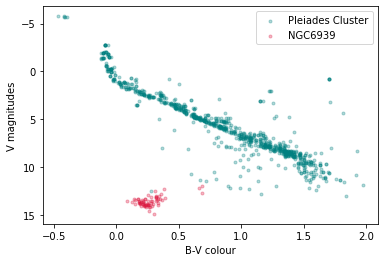

In [15]:
mask = (B_V_shift > 0) & (B_V_shift < 0.7)

fig, ax = plt.subplots() 
ax.scatter(BV_array, Vmag_array, color = 'teal', label = 'Pleiades Cluster', s = 9, alpha = 0.3)
ax.scatter(B_V_shift[mask], V_shift[mask],  color = 'crimson', label = 'NGC6939', s = 9, alpha =0.3 )
ax.invert_yaxis()
ax.set_ylabel('V magnitudes')
ax.set_xlabel('B-V colour')


plt.legend()




In [16]:
mask1 = ((B_V_shift > 0.1) & (B_V_shift < 0.35) & (V_shift > 11) & (V_shift < 16))
mask2 = ((BV_array > 0.1) & (BV_array < 0.35) & (Vmag_array > -5) & (Vmag_array < 3.5 ))

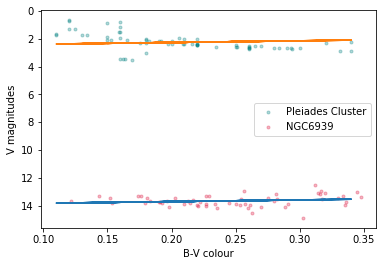

In [17]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

fig, ax = plt.subplots()
popt, pcov = curve_fit(func, B_V_shift[mask1], V_shift[mask1], maxfev = 10000)
k, q = curve_fit(func, B_V_shift[mask1], V_shift[mask1] -11.44, maxfev = 10000)
ax.plot(BV_array[mask2], func(BV_array[mask2], *popt))
ax.plot(BV_array[mask2], func(BV_array[mask2], *k))


ax.scatter(BV_array[mask2], Vmag_array[mask2], color = 'teal', label = 'Pleiades Cluster', s = 9, alpha = 0.3)
ax.scatter(B_V_shift[mask1], V_shift[mask1],  color = 'crimson', label = 'NGC6939', s = 9, alpha =0.3 )
ax.invert_yaxis()
ax.set_ylabel('V magnitudes')
ax.set_xlabel('B-V colour')


plt.legend()

Text(0, 0.5, 'Chi-square')

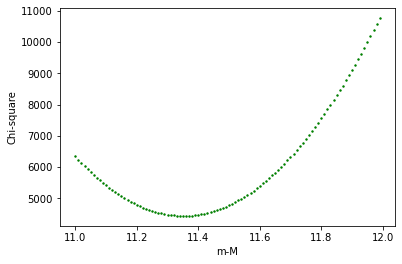

In [18]:
chisq_true = np.array([])

r_y_arr = np.ones(len(V_shift[mask1]))

for k in range(len(V_shift[mask1])):
    ry = Vmag_array[mask2][k]  - func(B_V_shift[mask1][k], *popt)
    r_y_arr[k] *= ry

dist = np.arange(11, 12, 0.01)

# create array for storage of chisquare values


for val in dist:
    
    chisq_arr = np.ones(len(V_shift[mask1]))
    
    for q in range(len(V_shift[mask1])):
        chisq = ((r_y_arr[q]+val)**2)/(NGC_cut['Verr'][mask1][q])**2 
            
        chisq_arr[q] *= chisq
      
    chisq_sum = np.sum(chisq_arr)
    
    chisq_true = np.append(chisq_true, chisq_sum)

fig, ax = plt.subplots()


ax.scatter(dist, chisq_true, color = 'green', s=2)
ax.set_xlabel('m-M')
ax.set_ylabel('Chi-square')






In [19]:
result = np.where(chisq_true == np.min(chisq_true))
print(result)
print(dist[35])

(array([35], dtype=int64),)
11.349999999999993


In [20]:
distance = 10*10**(11.44/5)
print(distance)
#11.1+0.1/-0.1 for M52


1940.8858775927774


In [21]:
one_sig = np.min(chisq_true) +1
print(one_sig)

4438.369355782873


Text(0.5, 1.0, 'Finding a minimum of Chi-square')

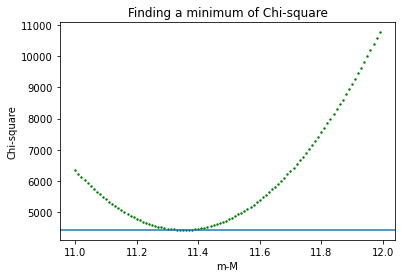

In [22]:
fig, ax = plt.subplots()


ax.scatter(dist, chisq_true, color = 'green', s=2)
ax.set_xlabel('m-M')
ax.set_ylabel('Chi-square')
plt.axhline(y= one_sig)
ax.set_title('Finding a minimum of Chi-square')

In [12]:
age = np.min(B_V_shift)
print(age)

0.11487782


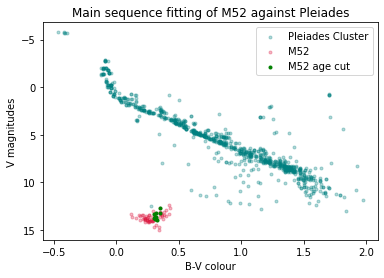

In [13]:
mask3 = (B_V_shift > 0.3) & (B_V_shift < 0.35) & (V_shift < 14) & (V_shift > 12) 
age = np.min(B_V_shift[mask3]) 
fig, ax = plt.subplots() 
ax.scatter(BV_array, Vmag_array, color = 'teal', label = 'Pleiades Cluster', s = 9, alpha = 0.3) 
ax.scatter(B_V_shift[mask], V_shift[mask], color = 'crimson', label = 'M52', s = 9, alpha =0.3 ) 
ax.scatter(B_V_shift[mask3], V_shift[mask3], color = 'green', label = 'M52 age cut', s = 9, alpha =1 )

ax.invert_yaxis() 
ax.set_ylabel('V magnitudes') 
ax.set_xlabel('B-V colour') 
ax.set_title('Main sequence fitting of M52 against Pleiades')

plt.legend()

mask3 = (B_V_shift > 0.1) & (B_V_shift < 0.4) & (V_shift < 13) & (V_shift > 12)
age = np.min(B_V_shift[mask3])
fig, ax = plt.subplots() 
ax.scatter(BV_array, Vmag_array, color = 'teal', label = 'Pleiades Cluster', s = 9, alpha = 0.3)
ax.scatter(B_V_shift[mask], V_shift[mask],  color = 'crimson', label = 'M52', s = 9, alpha =0.3 )
ax.scatter(B_V_shift[mask3], V_shift[mask3],  color = 'green', label = 'M52 age cut', s = 9, alpha =1 )

ax.invert_yaxis()
ax.set_ylabel('V magnitudes')
ax.set_xlabel('B-V colour')
ax.set_title('Main sequence fitting of M52 against Pleiades')

plt.legend()

In [14]:
print(age)

0.30067742
